In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import gaussian_kde, wasserstein_distance_nd
from pandas.plotting import parallel_coordinates
from matplotlib.lines import Line2D
from matplotlib.ticker import FormatStrFormatter
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler

In [4]:
scaler = 'StandardScaler'
kernel = 'rbf' 
gamma = None

params = {'scaler': scaler, 'kernel': kernel, 'gamma': gamma}

features = ['Sed_Thick', 'Dip', 'Vel', 'Rough']

In [6]:
from subductionPCA.Projector import Projector

projector = Projector(params=params, features=features, generate_figures=False)

projector.get_projector()

/home/val22/miniconda3/envs/dsml4pe/lib/python3.10/site-packages/sklearn/compose/_column_transformer.py:1651: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


FeatureUnion(transformer_list=[('Feature processing',
                                ColumnTransformer(remainder='passthrough',
                                                  transformers=[('Imputer',
                                                                 SimpleImputer(),
                                                                 ['Sed_Thick',
                                                                  'Dip', 'Vel',
                                                                  'Rough'])])),
                               ('PCA projection',
                                Pipeline(steps=[('preprocessing',
                                                 ColumnTransformer(transformers=[('Log. '
                                                                                  'Preprocessor',
                                                                                  Pipeline(steps=[('Imputer',
                                                                                                   SimpleImputer()),
                                                                                                  ('Log '
                                                                                                   'Transform',
                                                                                                   LogTransformer()),
                                                                                                  ('Scaler',
                                                                                                   StandardScaler())]),
                                                                                  ['Sed_Thick',
                                                                                   'Dip',
                                                                                   'Rough']),
                                                                                 ('Preprocessor',
                                                                                  Pipeline(steps=[('Imputer',
                                                                                                   SimpleImputer()),
                                                                                                  ('Scaler',
                                                                                                   StandardScaler())]),
                                                                                  ['Vel'])])),
                                                ('PCA',
                                                 KernelPCA(kernel='rbf',
                                                           n_components=4,
                                                           random_state=42))]))])

In [7]:
data = projector.data_projected
xmin, xmax = data.PC1.min()*1.25, data.PC1.max()*1.25
ymin, ymax = data.PC2.min()*1.25, data.PC2.max()*1.25

In [8]:
cumulative_explained_variance_ratio = projector.cumulative_explained_variance_ratio
ari = projector.ari
cumulative_explained_variance_ratio, ari

(array([0.16494797, 0.30584531, 0.40519074, ..., 1.        , 1.        ,
        1.        ]),
 0.5870154507688925)

In [14]:
def get_zone_dicts():
    '''
    Defines and returns a list of all considered subduction margins as well as dictionaries containing the margin's full 
    names and their assigned colours for plotting

    Called in: 
    - pc_space_distribution

    Returns: 
    - zones: list containing the names of all considered subduction margins
    - zone_color_dict: dictionary containing the margin's names and their assigned colours for plotting
    - zone_label_dict: dictionary containing the margin's names and their better-formatted version 
    '''

    zones = ['Sumatra', 'Solomon', 'Vanuatu', 'Tonga_Kermadec', 'Hikurangi', 'Kuril_Kamchatka', 'Japan', 'Izu_Bonin', \
         'Mariana', 'Nankai_Ryuku',  'Alaska_Aleutian', 'Cascadia', 'Middle_America', 'South_America']

    zone_color_dict = {'South_America': 'midnightblue', 'Sumatra': 'olive', 'Alaska_Aleutian': 'darkgreen', \
                       'Middle_America': 'r', 'Tonga_Kermadec': 'tab:brown', 'Mariana':'lawngreen', \
                       'Nankai_Ryuku': 'tab:cyan', 'Vanuatu': 'tab:purple', 'Solomon': 'deeppink', 'Japan': 'b', \
                       'Cascadia': 'gold', 'Kuril_Kamchatka': 'tab:gray', 'Hikurangi': 'tab:orange', 'Izu_Bonin': 'k'}

    zone_label_dict = {'South_America': 'South America', 'Sumatra': 'Sumatra', 'Alaska_Aleutian': 'Alaska-Aleutian', \
                       'Middle_America': 'Middle America', 'Tonga_Kermadec': 'Tonga-Kermadec', 'Mariana':'Mariana', \
                       'Nankai_Ryuku': 'Nankai-Ryukyu', 'Vanuatu': 'Vanuatu', 'Solomon': 'Solomon', 'Japan': 'Japan', \
                       'Cascadia': 'Cascadia', 'Kuril_Kamchatka': 'Kuril-Kamchatka', 'Hikurangi': 'Hikurangi', \
                       'Izu_Bonin': 'Izu-Bonin'}

    return zones, zone_color_dict, zone_label_dict


def get_feature_dict():
    feature_dict = {'Sed_Thick': 'Sediment thickness', 'Age': 'Plate Age', 'Dip': 'Dip angle',\
                'Vel': 'Relative plate velocity', 'Rough': 'Roughness'}
    unit_dict = {'Sed_Thick': 'm', 'Age': 'Ma', 'Dip': 'degrees',\
                'Vel': 'mm/yr', 'Rough': 'mGal'}
    return feature_dict, unit_dict


def get_low_margin_data(data):

    quiet_margins = ['Cascadia', 'Hikurangi', 'Izu_Bonin', 'Mariana', 'Middle_America', 'Nankai_Ryuku', \
                      'Solomon', 'Tonga_Kermadec', 'Vanuatu']

    return data[data.Sub_Zone.isin(quiet_margins)]

def get_mag_cmap():
    norm = plt.Normalize(vmin=4, vmax=9.5)
    cmap = mpl.cm.get_cmap('viridis', 11) 
    cmap.set_under('k')
    return cmap, norm

def get_subtitle_dict():
    subtitle_dict = {'Sumatra': 'Quiet and extreme:', 'Solomon': 'Active and moderate:', 'Vanuatu': 'Active and moderate:',
                     'Tonga_Kermadec': 'Active and moderate:','Hikurangi': 'Quiet and extreme:', 
                     'Kuril_Kamchatka': 'Quiet and extreme:','Japan': 'Quiet and extreme:', 
                     'Izu_Bonin': 'Quiet and extreme:', 'Mariana': 'Active and moderate:',
                     'Nankai_Ryuku': 'Quiet and extreme:', 'Alaska_Aleutian': 'Quiet and extreme:',
                     'Cascadia': 'Quiet and extreme:', 'Middle_America': 'Quiet and extreme:',
                     'South_America': 'Quiet and extreme:'}
    return subtitle_dict 

In [15]:
def plot_margins(data, ax, s=25, subtitle_dict=None): # ChatGPT generated (Oct 7 2024)
    zones, zone_color_dict, zone_label_dict = get_zone_dicts()
    
    # Store scatter plots in groups based on subtitles
    scatter_handles = {}

    for zone in zones:
        if zone in data.Sub_Zone.unique():
            zonedata = data[data.Sub_Zone == zone]
            scatter = ax.scatter(zonedata.PC1, zonedata.PC2, 
                                 c=zone_color_dict[zone], 
                                 s=s, 
                                 label=zone_label_dict[zone])
            # Assign scatter to the corresponding subtitle
            subtitle = subtitle_dict.get(zone, 'Other')  # Default to 'Other' if no subtitle is given
            if subtitle not in scatter_handles:
                scatter_handles[subtitle] = []
            scatter_handles[subtitle].append(scatter)
        else:
            pass

    return scatter_handles


def heatmap(heatmap_data, ax, cax, mag_range = [8.5,10], fontsize = 12):
    
    xmin, xmax = heatmap_data.PC1.min()-0.1, heatmap_data.PC1.max()+0.1
    ymin, ymax = heatmap_data.PC2.min()-0.1, heatmap_data.PC2.max()+0.1
        
    # calculate overall density in the PC space
    x1, y1 = np.array(heatmap_data.PC1, dtype = float), np.array(heatmap_data.PC2, dtype = float)
    xi, yi = np.mgrid[xmin:xmax:x1.size**0.5*1j, ymin:ymax:y1.size**0.5*1j]
    k1 = gaussian_kde(np.vstack([x1, y1]))
    zi1 = k1(np.vstack([xi.flatten(), yi.flatten()]))
    
    # calculate density of M8.5+ earthquakes in the PC space
    heatmap_data = heatmap_data[(heatmap_data.Max_mag >= mag_range[0]) & (heatmap_data.Max_mag <= mag_range[1])]
    x2, y2 = np.array(heatmap_data.PC1, dtype = float), np.array(heatmap_data.PC2, dtype = float)
    k2 = gaussian_kde(np.vstack([x2, y2]))
    zi2 = k2(np.vstack([xi.flatten(), yi.flatten()]))
    
    zi = zi2-zi1

    heatmap = ax.contourf(xi, yi, zi.reshape(xi.shape), cmap = 'coolwarm', alpha = 0.7)
    
    cbar = plt.colorbar(heatmap, cax=cax, orientation='horizontal')
    cbar.set_label(label = '$M_{max} \geq$ 8.5 density', fontsize=fontsize)
    
    return heatmap


def create_custom_legend(ax, scatter_handles, fontsize=12, legend_loc = (1.05, 0.1)): # ChatGPT generated (Oct 7 2024)
    handles = []
    labels = []
    
    for subtitle, scatter_list in scatter_handles.items():
        handles.append(Line2D([0], [0], color='none', label=subtitle))
        labels.append(subtitle)
        
        for scatter in scatter_list:
            handles.append(scatter)
            labels.append(scatter.get_label())

    lgnd = ax.legend(handles=handles, labels=labels, loc=legend_loc, ncol=1, fontsize=fontsize, handletextpad=0.5)
    
    for text in lgnd.get_texts():
        if text.get_text() in scatter_handles: # for subtitles
            text.set_fontsize(fontsize)
            text.set_weight('bold')
            text.set_fontstyle('italic')
        else: # for margins
            text.set_fontsize(fontsize)

    lgnd._legend_box.align = "left"
    return lgnd


## Fig. 1

In [8]:
def pc_space_summary(data):
    fig,ax = plt.subplots(2,3, figsize = (11,10), gridspec_kw={"width_ratios":[1, 1, 0.05]})
    fig.subplots_adjust(wspace = 0.25, hspace = 0.25)

    fig.delaxes(ax[0,1])
    fig.delaxes(ax[0,2])

    fontsize = 10 # title fontsize will be 1 point larger 

    # scatter margins
    ax[0,0].scatter(data.PC1, data.PC2, c = 'k', s = 20)
    scatter_handles = plot_margins(data, ax[0,0], s=15, subtitle_dict=get_subtitle_dict())

    # density plots
    sns.kdeplot(x=data['PC1'], y=data['PC2'], ax=ax[1,0], fill=True, cmap='Blues', alpha = 0.9)
    ax[1,0].set_xlabel(' ') # remove automatically generated axis labels
    ax[1,0].set_ylabel(' ')

    ax[1,0].text(0.33, 0.7, f'ARI = {np.round(100*ari, 1)}%', fontsize=fontsize, weight = 'bold')


    # max. mag. plots
    ax[1,1].scatter(data.PC1, data.PC2, c = 'k', s = 20)

    cmap,norm = get_mag_cmap()
    data_sorted = data.sort_values(by = 'Max_mag', ascending = True)
    magnitudes = ax[1,1].scatter(data_sorted.PC1, data_sorted.PC2, c = data_sorted.Max_mag, s = 15, cmap=cmap, vmin = 4, vmax = 9.5)
    magnitudes.cmap.set_under('k') 

    # magnitude colourbar
    cbar = plt.colorbar(magnitudes, cax=ax[1,2], orientation='vertical', extend = 'min')
    cbar.set_label(label = 'Maximum magnitude', fontsize=fontsize, labelpad = 20)

    lgnd = create_custom_legend(ax[0,0], scatter_handles, fontsize=fontsize, legend_loc = (1.15, 0))
    lgnd.set_title('Subduction margins', prop={'size':fontsize+1, 'weight':'bold'})

    for i in range(16):
        try:
            lgnd.legendHandles[i]._sizes = [40]
        except IndexError:
            pass

    # set titles
    ax[0,0].set_title('PC space by margins', fontsize=fontsize+2, weight='bold')
    ax[1,0].set_title('PC space density plot', fontsize=fontsize+2, weight='bold')
    ax[1,1].set_title('PC space by max. magnitudes', fontsize=fontsize+2, weight='bold')


    # set same axis extents
    for j in range(2):
        for i in range(2):
            ax[i,j].set_xlim([xmin, xmax])
            ax[i,j].set_ylim([ymin, ymax])

    # axes and tick labels
    for k in range(2): 
        ax[k,0].set_ylabel('PC2', fontsize=fontsize, weight = 'bold', labelpad = 10) # y labels
        ax[1,k].set_xlabel('PC1', fontsize=fontsize, weight = 'bold', labelpad = 5) # x labels

    for i in range(2): # ticks on plots + mag. colourbar
        for j in range(2): 
            ax[i,j].tick_params(axis='both', which='major', labelsize=fontsize) 
            ax[i,j].xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
            ax[i,j].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
            ax[i,j].xaxis.set_major_locator(ticker.MaxNLocator(nbins=5)) 
            
    plt.show()

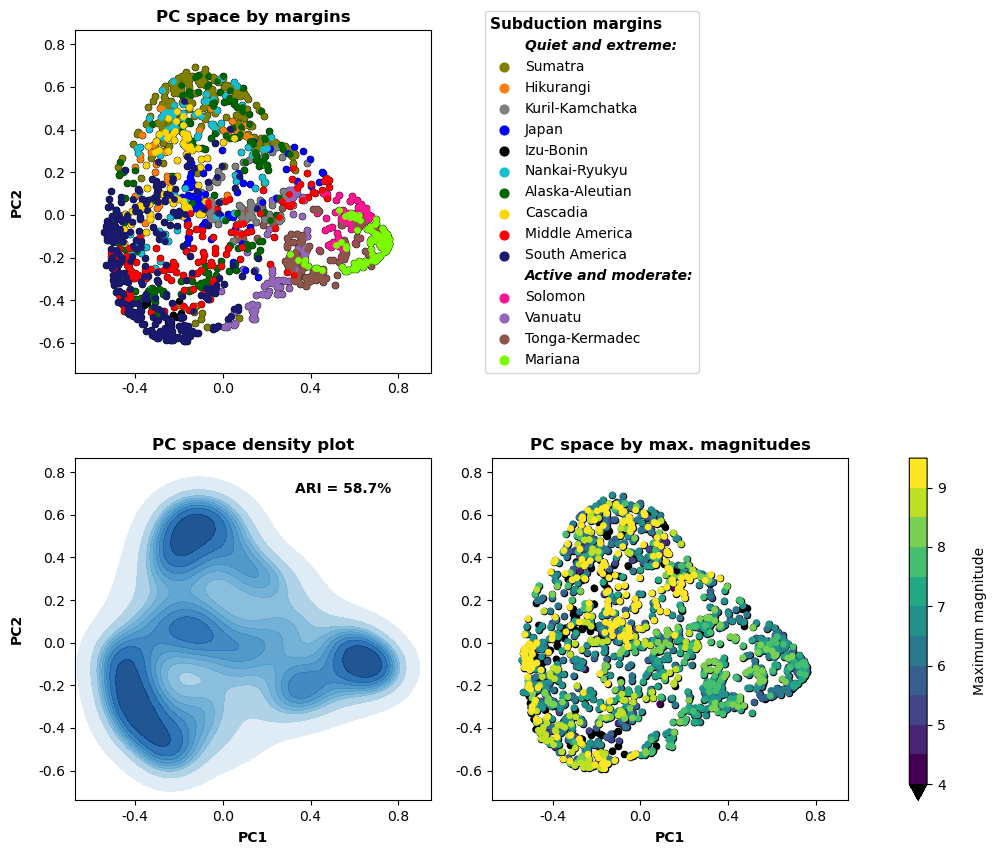

In [9]:
pc_space_summary(data)

## Fig. 2

In [10]:
def plot_hazard_assessment(data):
    fig,[ax,cax] = plt.subplots(2,1, figsize = (4.5,5), gridspec_kw={"height_ratios":[1,0.05]})
    fig.subplots_adjust(hspace=0.4)

    fontsize = 10 # title fontsize will be 1 point larger 

    h = heatmap(data, ax, cax, mag_range=[8.5,10], fontsize = fontsize)

    plot_margins(get_low_margin_data(data), ax, subtitle_dict=get_subtitle_dict())

    lgnd = ax.legend(loc = (1.05, 0.25), ncol = 1, fontsize=fontsize, facecolor = 'none', edgecolor = 'none')
    lgnd.set_title('Margins with no M$\geq$8.5 \nearthquakes since 1900', prop={'size':fontsize+1})
    lgnd._legend_box.align = "left"

    for i in range(14):
        try:
            lgnd.legendHandles[i]._sizes = [40]
        except IndexError:
            pass

    ax.set_title('Low $M_{max}$-margins hazard assessment', fontsize=fontsize+1, pad = 10)

    ax.set_xlabel('PC1', fontsize=fontsize, labelpad = 10)
    ax.set_ylabel('PC2', fontsize=fontsize, labelpad = 10)
    ax.tick_params(axis='both', which='major', labelsize=fontsize)
    
    plt.show()

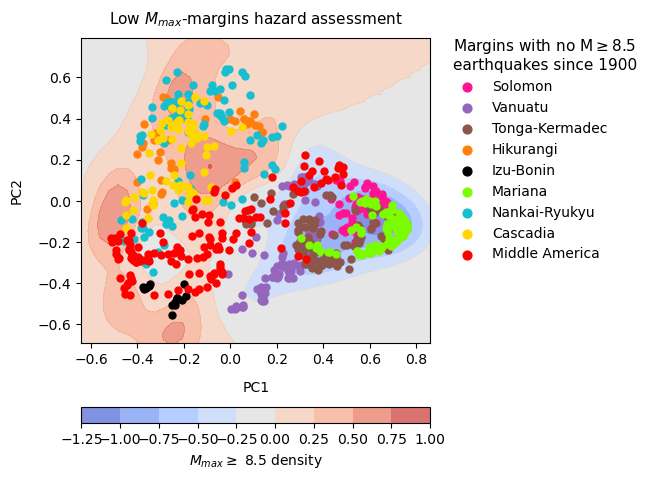

In [11]:
plot_hazard_assessment(data)

## Fig. 3

In [14]:
def feature_importance_plots(data):
    fig,ax = plt.subplots(2,4, figsize = (13,10), gridspec_kw={"width_ratios":[1, 0.05, 1, 0.05]})
    fig.subplots_adjust(wspace = 0.5, hspace = 0.3)
    
    fontsize=12

    axes = [ax[0,0], ax[0,2], ax[1,0], ax[1,2]]
    cbars = [ax[0,1], ax[0,3], ax[1,1], ax[1,3]]

    features = ['Sed_Thick', 'Dip', 'Vel', 'Rough']
    var = projector.cumulative_explained_variance_ratio
    feature_dict, unit_dict = get_feature_dict()

    for i in range(4): 

        # colorbar extent: (to avoid extremes/outliers influencing colorbar)
        vmin, vmax = data[features[i]].min(), np.percentile(data[features[i]], 90)

        # scatter data points: 
        axes[i].scatter(data['PC1'], data['PC2'], s = 60, c = 'white')
        feature_plot = axes[i].scatter(data['PC1'], data['PC2'], s = 40, c = data[features[i]], \
                                       cmap = mpl.cm.get_cmap('plasma', 8), vmin=vmin, vmax=vmax)

        # colorbar: 
        cbar = fig.colorbar(feature_plot, cax=cbars[i])
        cbar.set_label(label=f'{feature_dict[features[i]]} ({unit_dict[features[i]]})', fontsize = fontsize)
        cbar.ax.tick_params(labelsize=fontsize)
        cbar.ax.yaxis.set_label_position('left')
        cbar.ax.yaxis.set_ticks_position('left')

        # titles: 
        axes[i].set_title(f'{feature_dict[features[i]]}', fontsize=fontsize+1, pad=10)

    # axes labels + ticks
    ax[0,0].set_ylabel(f'PC2 ({np.round(100*(var[1]-var[0]), 1)}% variance)', fontsize=fontsize, labelpad=10)
    ax[1,0].set_ylabel(f'PC2 ({np.round(100*(var[1]-var[0]), 1)}% variance)', fontsize=fontsize, labelpad=10)
    ax[1,0].set_xlabel(f'PC1 ({np.round(100*(var[0]), 1)}% variance)', fontsize=fontsize, labelpad=10)
    ax[1,2].set_xlabel(f'PC1 ({np.round(100*(var[0]), 1)}% variance)', fontsize=fontsize, labelpad=10)

    for ax in axes + cbars:
        ax.tick_params(axis='both', which='major', labelsize=fontsize)

    for ax in axes:
        ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%.1f'))
        ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%.1f'))
        
    plt.show()

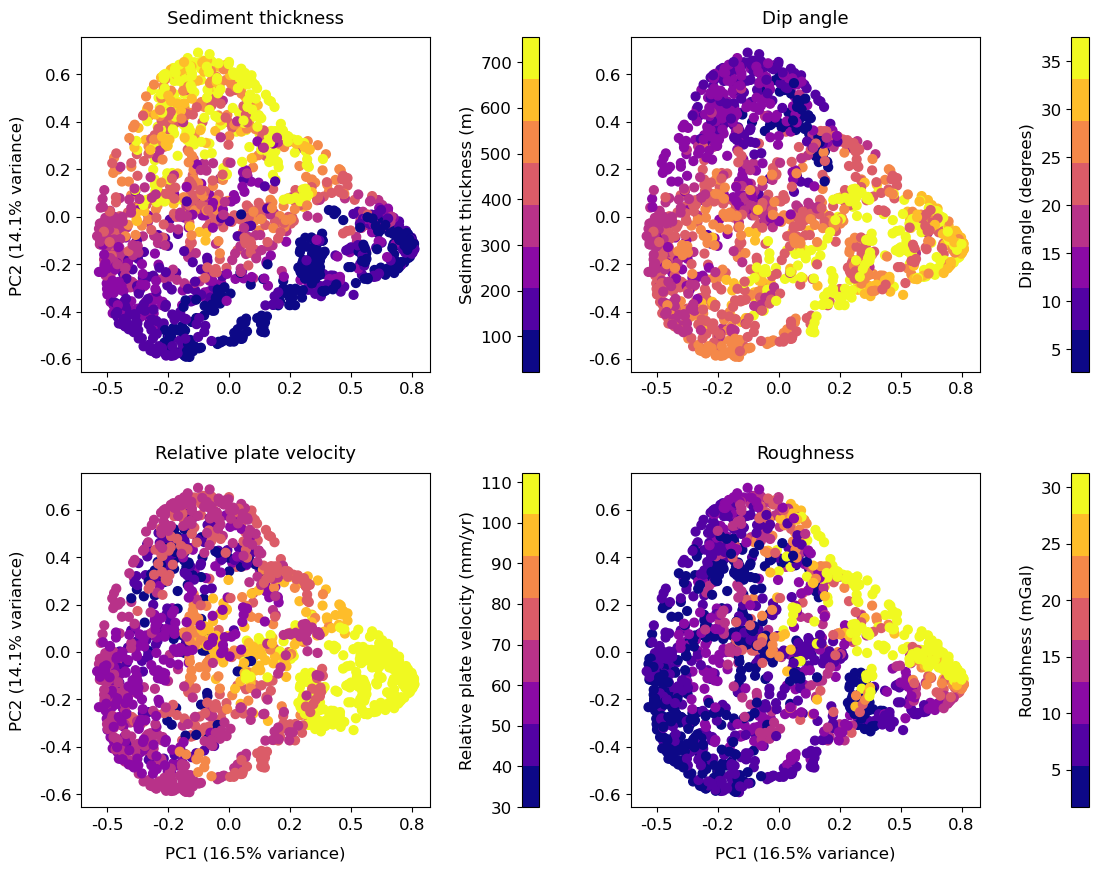

In [15]:
feature_importance_plots(data)

## Fig. 4

In [16]:
def different_heatmaps(data, fontsize=12):
    fig,ax = plt.subplots(2,3, figsize = (11,4), gridspec_kw={"height_ratios":[1, 0.05]})
    fig.subplots_adjust(wspace = 0.25, hspace = 0.4)

    heatmap(heatmap_data=data, ax=ax[0,0], cax=ax[1,0], mag_range=[8.5, 10])
    heatmap(heatmap_data=data, ax=ax[0,1], cax=ax[1,1], mag_range=[8, 10])
    heatmap(heatmap_data=data, ax=ax[0,2], cax=ax[1,2], mag_range=[0, 4])

    titles = ['$M_{max} \geq 8.5$', '$M_{max} \geq 8$', '$M_{max} \leq 4$']

    for i in range(3):
        ax[0,i].set_xlabel('PC1', fontsize=fontsize, labelpad = 2, weight = 'bold')
        ax[0,i].set_title(titles[i], fontsize = fontsize+2, weight = 'bold', pad=10)

        for j in range(2):
            ax[j,i].tick_params(axis='both', which='major', labelsize=fontsize) 
            ax[j,i].yaxis.set_major_formatter(FormatStrFormatter('%.1f')) 
            ax[j,i].xaxis.set_major_formatter(FormatStrFormatter('%.1f')) 

    ax[0,0].set_ylabel('PC2', fontsize=fontsize, labelpad = 10, weight = 'bold')
    
    plt.show()

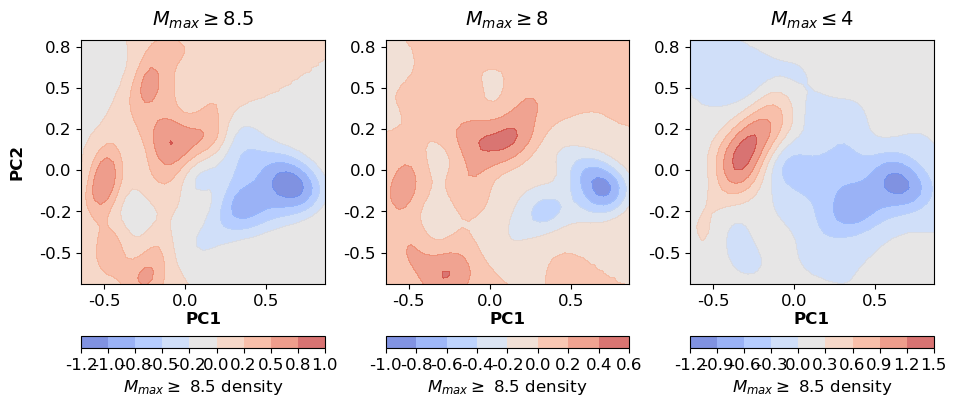

In [17]:
different_heatmaps(data)

## Fig. 5

In [18]:
def plot_pca_pairplot(data, pc_columns=['PC1', 'PC2', 'PC3', 'PC4'], color_feature='Max_mag', fontsize=12):
    """
    Function to create a pair plot of given principal components without seaborn.
    
    Parameters:
    data (pd.DataFrame): DataFrame containing the principal component columns and the color feature.
    color_feature (str): Column name of the feature used for color-coding the points.
    pc_columns (list): List of column names corresponding to the principal components.
    title (str): The title of the entire figure (suptitle).
    
    Returns:
    A pair plot of the principal components with a shared colorbar for all subplots.
    """
    
    data = data.sort_values(by=color_feature, ascending=True)
    c_feature = data[color_feature]
    num_pcs = len(pc_columns)

    cmap,norm = get_mag_cmap()
        
    fig, axes = plt.subplots(num_pcs, num_pcs, figsize=(12, 12), sharex=False, sharey=False)
    fig.subplots_adjust(hspace=0.3, wspace = 0.3)
    plt.subplots_adjust(right=0.9)

    for i in range(num_pcs):
        for j in range(num_pcs):
            ax = axes[i, j]
            if i == j:
                ax.hist(data[pc_columns[i]], bins=20, color='gray', alpha=0.7) # histogram on diagonal
            else: # scatter plots
                scatter = ax.scatter(data[pc_columns[j]], data[pc_columns[i]], c=c_feature, cmap=cmap, norm=norm, s=15)
            
            if i == num_pcs - 1:
                ax.set_xlabel(pc_columns[j], weight='bold', fontsize=fontsize)
            if j == 0:
                ax.set_ylabel(pc_columns[i], weight='bold', fontsize=fontsize)
    
    # colourbar
    cbar_ax = fig.add_axes([0.92, 0.1, 0.02, 0.8]) 
    cbar = fig.colorbar(scatter, cax=cbar_ax, extend = 'min')
    cbar.set_label('Maximum magnitude', fontsize = fontsize, weight='bold', labelpad= 10)
    
    fig.suptitle('PC space pair plots', fontsize=fontsize+2, fontweight='bold', y=0.91)
    
    plt.show()

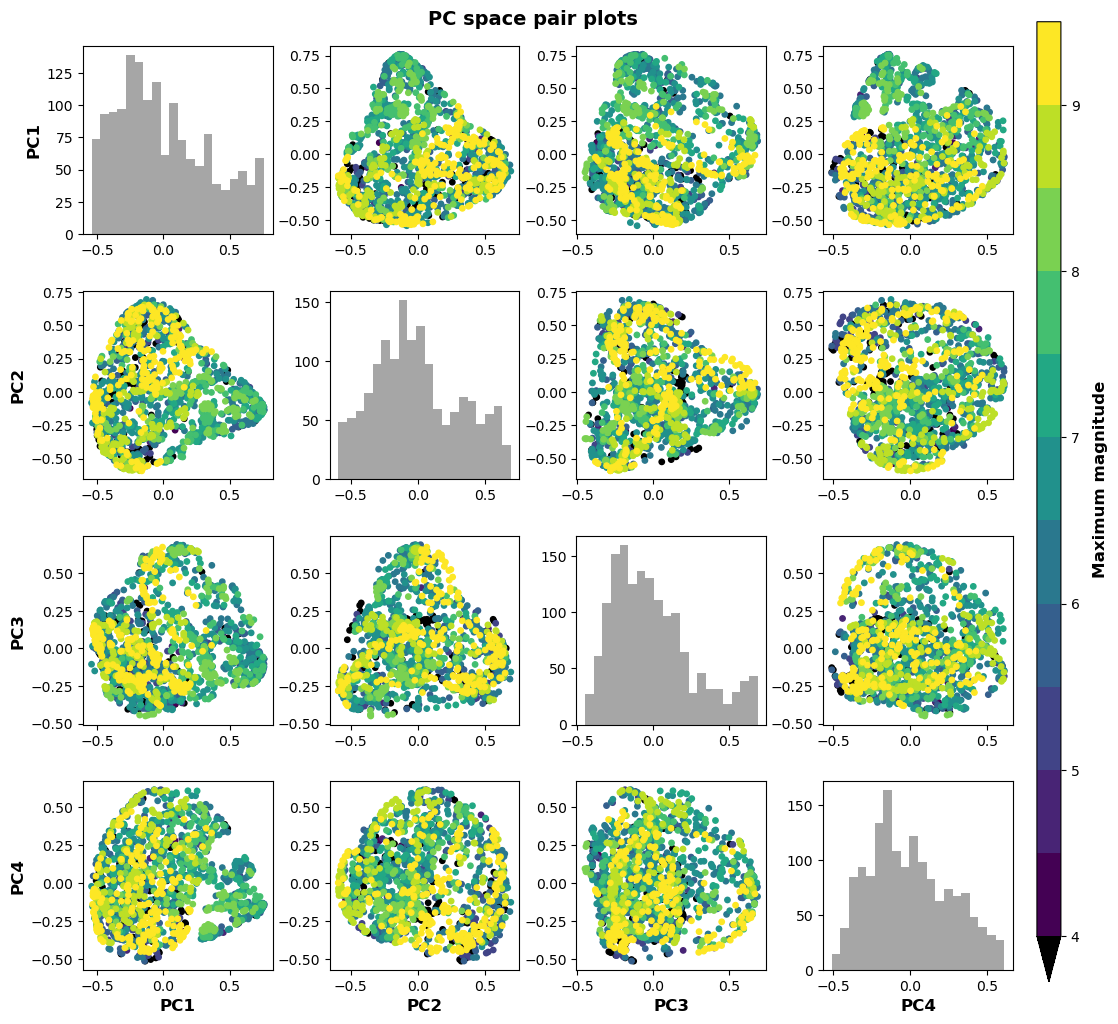

In [19]:
plot_pca_pairplot(data=data)

## Fig. 6

In [11]:
def plot_parallel_coordinates(ax, data, pc_columns=['PC1', 'PC2', 'PC3', 'PC4'], fontsize=12):
    """
    Function to create a parallel coordinates plot using matplotlib.
    
    Parameters:
    ax: Figure subplot where the plot is created. 
    data (pd.DataFrame): DataFrame containing the principal component columns and the color feature.
    pc_columns (list): List of column names corresponding to the principal components.
    
    Returns:
    A parallel coordinates plot with a shared color scale for all lines.
    """
    
    data = data.sort_values(by = 'Max_mag', ascending=True) # sort the data by maximum magnitude for better visualization
    cmap,norm = get_mag_cmap()
    
    for idx in range(len(data)): # plotting parallel coordinates line for each data point 
        row = data.iloc[idx][pc_columns].values
        color_value = data['Max_mag'].iloc[idx]
        ax.plot(range(len(pc_columns)), row, color=cmap(norm(color_value)), alpha=0.5)
    
    # axis ticks and labels
    ax.set_xticks(range(len(pc_columns)))
    ax.set_xticklabels(pc_columns, fontsize=fontsize)
    ax.set_xlim([0, len(pc_columns) - 1])
    ax.set_xlabel('Principal Components', fontsize=fontsize)
    ax.set_ylabel('PC values', fontsize=fontsize) 
    
    ax.set_title('PCs parallel coordinates plot', weight='bold', fontsize=fontsize)

    
def plot_parallel_coordinates_ft(ax, data, feature_columns=['Sed_Thick', 'Dip', 'Vel', 'Rough'], fontsize=12):
    """
    Function to create a parallel coordinates plot with standardized feature values using matplotlib.
    
    Parameters:
    ax: Figure subplot where the plot is created.
    data (pd.DataFrame): DataFrame containing the feature columns and the color feature.
    feature_columns (list): List of column names corresponding to the features to be plotted.
    fontsize (int or float): Fontsize for plot ticks and labels. 
    
    Returns:
    A parallel coordinates plot with standardized features and a shared color scale for all lines.
    """
    
    # create a dataframe with standardized features and maximum magnitude
    scaler = StandardScaler()
    standardized_data = pd.DataFrame(scaler.fit_transform(data[feature_columns]), columns=feature_columns)
    standardized_data['Max_mag'] = data['Max_mag'].values
    
    # sort the data by maximum magnitude for better visualization
    standardized_data = standardized_data.sort_values(by='Max_mag', ascending=True)
    
    cmap,norm = get_mag_cmap()
    
    for idx in range(len(standardized_data)): # plotting parallel coordinates line for each data point 
        row = standardized_data.iloc[idx][feature_columns].values
        color_value = standardized_data['Max_mag'].iloc[idx]
        ax.plot(range(len(feature_columns)), row, color=cmap(norm(color_value)), alpha=0.5)
    
    # axis ticks and labels
    ax.set_xticks(range(len(feature_columns)))
    xlabels = ['Sed. thickness', 'Dip angle', 'Rel. velocity', 'Roughness']
    ax.set_xticklabels(xlabels, rotation=30, ha='right', fontsize=fontsize)  # Rotate labels by 30 degrees
    ax.set_xlim([0, len(feature_columns) - 1])
    
    ax.set_ylim([-2.6, 10])
    ax.set_ylabel('Standardized feature values', fontsize=fontsize)
    
    ax.tick_params(axis='both', which='major', labelsize=fontsize)
    
    ax.set_title('Features parallel coordinates plot', weight='bold', fontsize=fontsize)


In [35]:
def parallel_coords_figure(data):
    fig,ax = plt.subplots(1,3, figsize = (10,4), gridspec_kw={"width_ratios":[1, 1, 0.05]})
    fig.subplots_adjust(wspace = 0.4)

    plot_parallel_coordinates(ax[0],data)
    plot_parallel_coordinates_ft(ax[1],data)
    
    cmap,norm = get_mag_cmap()
    cbar = mpl.colorbar.ColorbarBase(ax[2], cmap=cmap, norm=norm, orientation = 'vertical', extend = 'min')
    cbar.set_label('Maximum magnitude', fontsize=12, labelpad = 10)
    cbar.ax.yaxis.set_label_position('left')
    cbar.ax.yaxis.set_ticks_position('left')
    ax[2].tick_params(axis='y', which='major', labelsize=12) 
    
    plt.show()

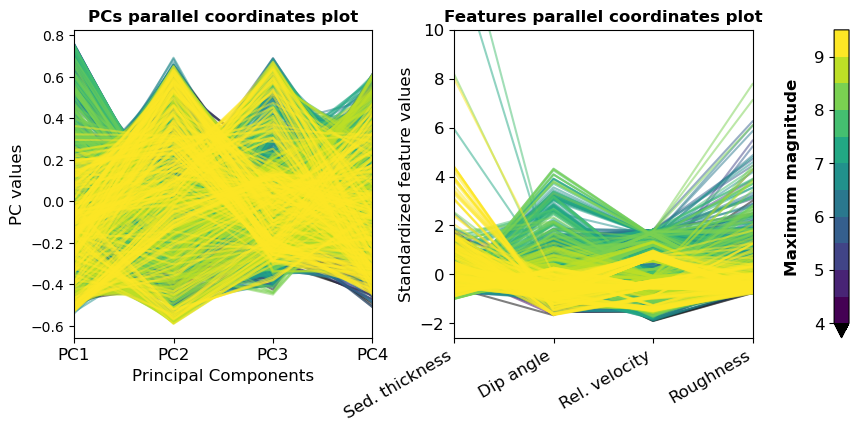

In [36]:
parallel_coords_figure(data)

## Fig. 7

In [23]:
def calculate_wasserstein_metric(data, zone1, zone2):
    array1 = np.array(data[data.Sub_Zone == zone1][['PC1', 'PC2']])
    array2 = np.array(data[data.Sub_Zone == zone2][['PC1', 'PC2']])
    return wasserstein_distance_nd(array1, array2)

def create_confusion_matrix(data):
    zones, _, __ = get_zone_dicts()
    n_zones = len(zones)
    
    w_distances = np.zeros((n_zones, n_zones)) # initialize matrix to store distances
    
    # loop through zones to calculate the distance for each pair of zones 
    for i, zone1 in enumerate(zones):
        for j, zone2 in enumerate(zones):
            w_distances[i, j] = calculate_wasserstein_metric(data, zone1, zone2)
    
    w_distances_df = pd.DataFrame(w_distances, index=zones, columns=zones)
    
    # plot confusion matrix as a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(w_distances_df, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
    plt.title(f'Wasserstein Metric Confusion Matrix ({projector.params["kernel"]})')
    plt.show()

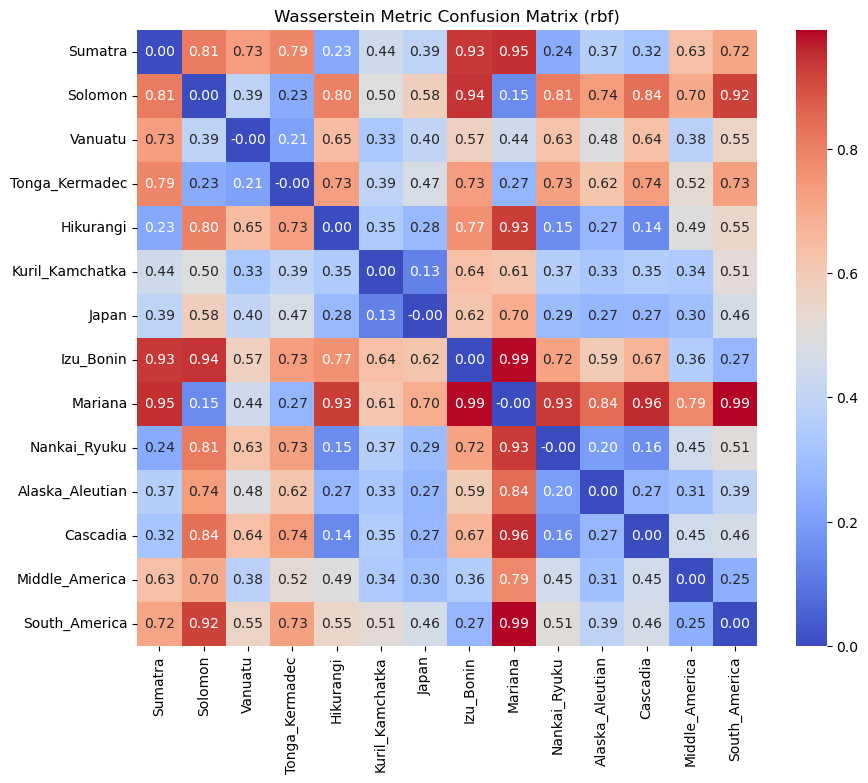

In [24]:
create_confusion_matrix(data)

## Fig. 8

In [25]:
def variance_plot(var):
    fig,ax = plt.subplots(1,1, figsize = (len(var)/100,3))
    fontsize=12

    ax.plot(np.arange(len(var)), var, '--o')

    ax.set_ylim([0,1.1])
    ax.set_xlabel('Principal components', fontsize=fontsize)
    ax.set_ylabel('Variance explained', fontsize=fontsize)
    ax.set_title('Cumulative explained variance ratio', weight='bold', fontsize=fontsize) 
    ax.tick_params(axis='both', which='major', labelsize=fontsize)
    
    for i in range(4):
        text_location = (i+7, cumulative_explained_variance_ratio[i]-.03)
        ax.annotate(f'{np.round(100*cumulative_explained_variance_ratio[i],1)}%', text_location, fontsize = fontsize)
    
    plt.show()

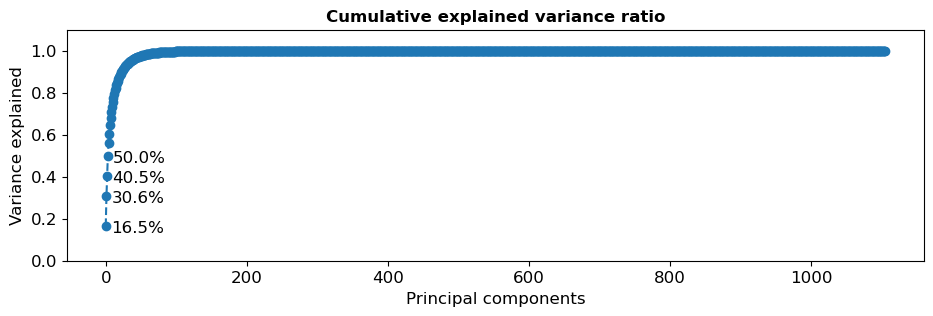

In [26]:
variance_plot(projector.cumulative_explained_variance_ratio)